# <font color="#00000"> Credit Decisioning Model</font>


In [11]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings("ignore")

In [12]:
#Load the dataset
data = pd.read_csv("data/credit-data.csv")

In [13]:
#inspect the dataset
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:

print("The shape =", data.shape)

num_rows, num_cols = data.shape
num_features = num_cols - 1
total_data = num_rows * num_cols

print("No. of rows:", num_rows)
print("No. of columns:", num_cols)
print("No of features:", num_features)
print("Total data:",total_data)

The shape = (614, 13)
No. of rows: 614
No. of columns: 13
No of features: 12
Total data: 7982


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [16]:
#categorical data
data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [17]:
#Numerical data
data.describe().T.round(2) #T.round(2) rounds up the data upto two decimals

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


**Description**

* **count:** The number of non-null values in the dataset for a given variable.
* **mean:** The average value, calculated by summing all values and dividing by the count.
* **Standard Deviation (std):** Measures how spread out the data is around the mean. A higher standard deviation indicates greater variability.
* **min:** The smallest value present in the dataset for that variable.
* **25%:** The first quartile. 25% of the data falls below this value.
* **50%:** The median or second quartile. 50% of the data falls below this value.
* **75%:** The third quartile. 75% of the data falls below this value.
* **max:** The largest value present in the dataset for that variable.

Now, we have done inspecting the data, let's move forward with the next step exlporing the data

**Exploratory Data Analysis**, we'll be visualising the data here to understand more in depth about the data.

**Visualising the Data**

Mean Income: 5403.459283387622
Applicants with Higher Income than mean: 176
Applicants with Lower Income than mean: 438


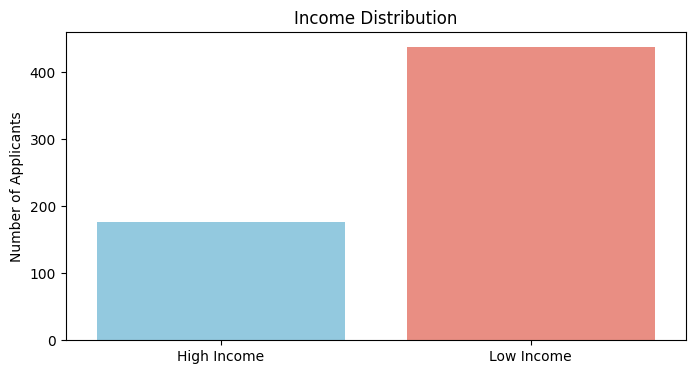

In [18]:
# Calculate the average income
mean_income = data['ApplicantIncome'].mean()
print("Mean Income:", mean_income)

# Count applicants above and below mean income
high_income_count = (data['ApplicantIncome'] > mean_income).sum()
low_income_count = (data['ApplicantIncome'] <= mean_income).sum()



print('Applicants with Higher Income than mean:', high_income_count)
print('Applicants with Lower Income than mean:', low_income_count)

# Visualize income distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=['High Income', 'Low Income'], y=[high_income_count, low_income_count], palette=["skyblue", "salmon"])  
plt.title('Income Distribution')
plt.ylabel('Number of Applicants')
plt.show()

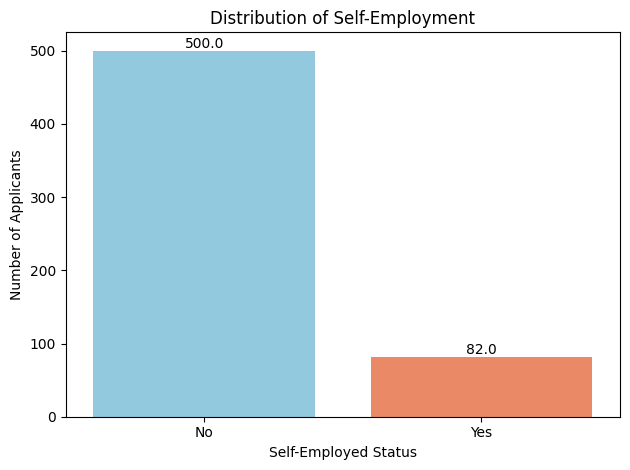

In [19]:
sns.countplot(x="Self_Employed", data=data, palette=["skyblue", "coral", "lightgreen"])  

# Add labels and title
plt.xlabel('Self-Employed Status')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Self-Employment')

# Add count labels on top of the bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

plt.tight_layout()

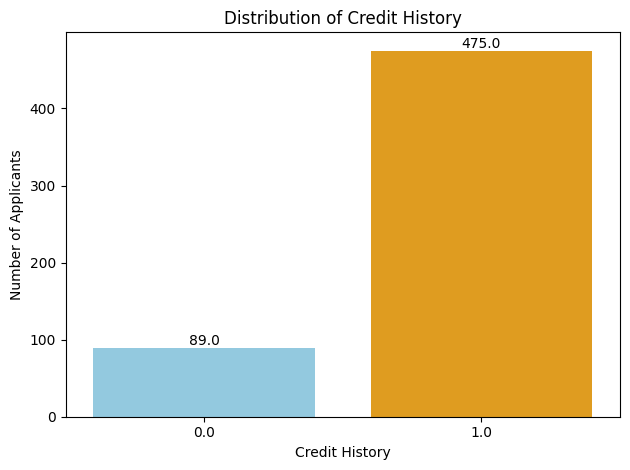

In [20]:
# Create the count plot with a custom color palette
sns.countplot(x="Credit_History", data=data, palette=["skyblue", "orange"]) 


plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Credit History')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

plt.tight_layout()

plt.show()

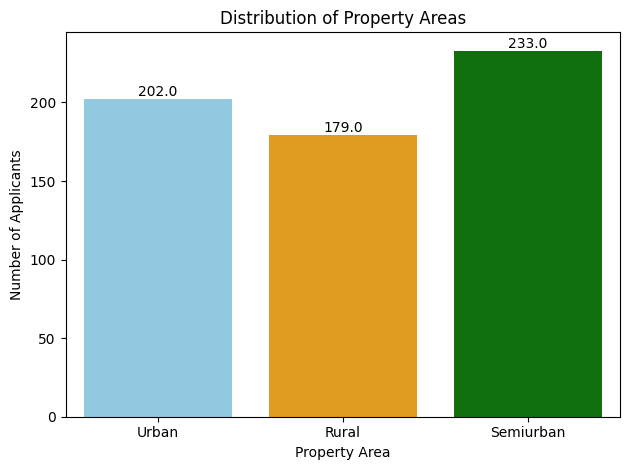

In [21]:
sns.countplot(x="Property_Area", data=data, palette=["skyblue", "orange", "green"])  

# Add labels and title
plt.xlabel('Property Area')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Property Areas')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

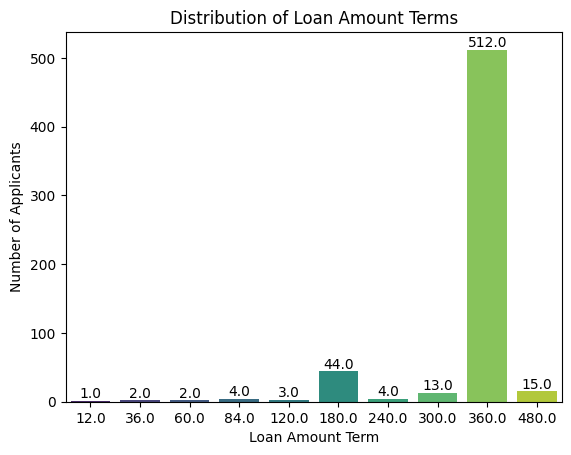

In [22]:
sns.countplot(x="Loan_Amount_Term", data=data, palette="viridis")

# Add labels and title
plt.xlabel('Loan Amount Term')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Amount Terms')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

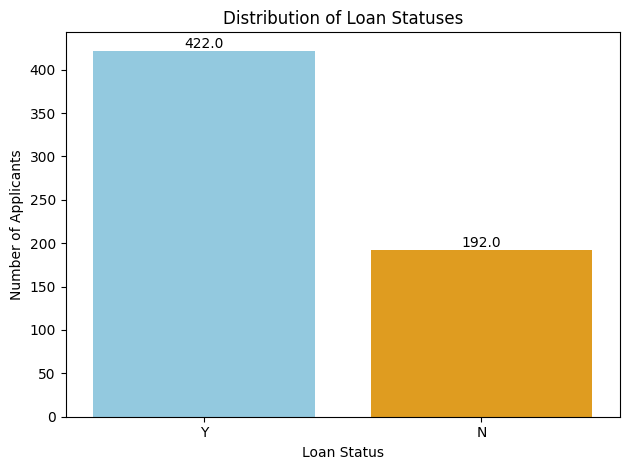

In [23]:
# Create the count plot with a custom color palette
sns.countplot(x="Loan_Status", data=data, palette=["skyblue", "orange"]) 

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Loan Statuses')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

plt.tight_layout()

# Show the plot
plt.show()

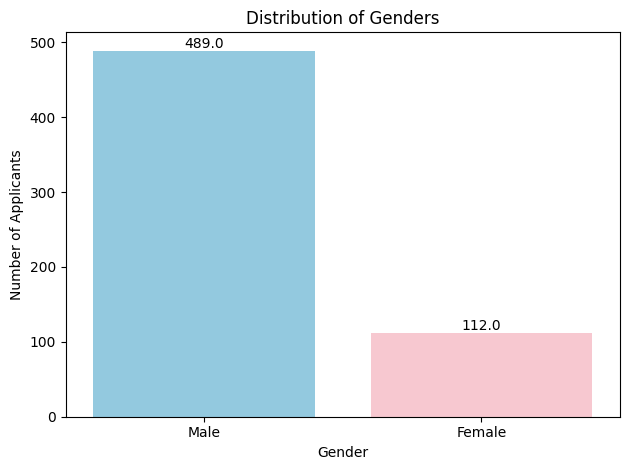

In [24]:
sns.countplot(x="Gender", data=data, palette=["skyblue", "pink"])  # Assuming two genders: Male and Female

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Genders')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

plt.tight_layout()

plt.show()

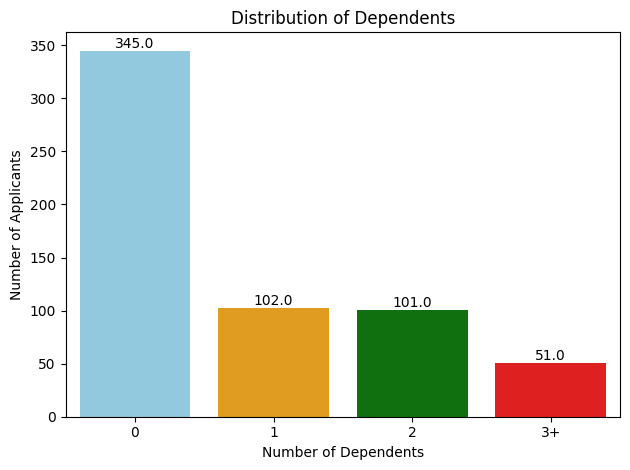

In [25]:
sns.countplot(x="Dependents", data=data, palette=["skyblue", "orange", "green", "red", "purple"])

plt.xlabel('Number of Dependents')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Dependents')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                xy=(p.get_x() + p.get_width() / 2, height), 
                ha='center', 
                va='bottom')

plt.tight_layout()
plt.show()

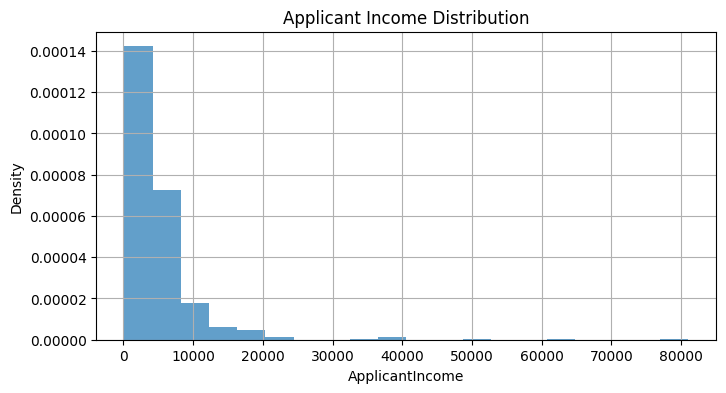

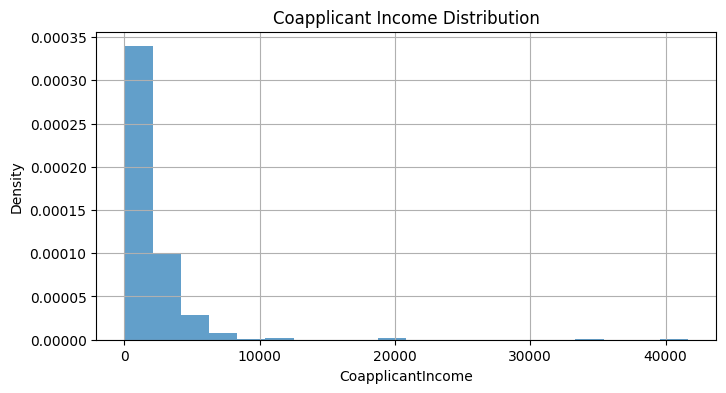

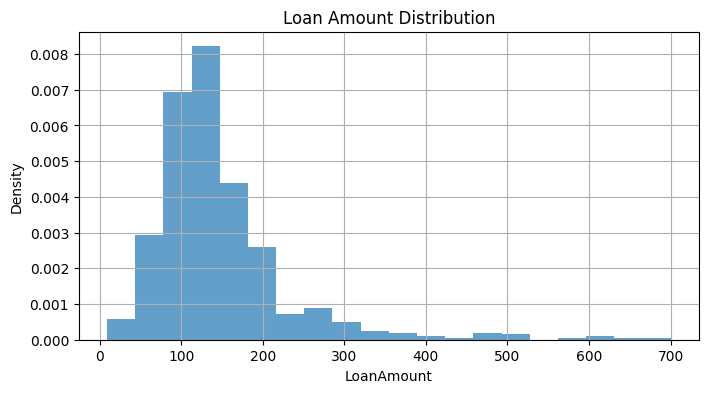

In [26]:
#Graph to analyse the outliers in the data for numerical values like applicant income, co-applicant income, loan amount

def plot_distribution(data, column, title):
    """Plots the distribution of a numerical column using Matplotlib."""
    plt.figure(figsize=(8, 4))
    plt.hist(data[column], bins=20, density=True, alpha=0.7)  # Adjust bins as needed
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

plot_distribution(data, "ApplicantIncome", "Applicant Income Distribution")
plot_distribution(data, "CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution(data, "LoanAmount", "Loan Amount Distribution")

Correlation Analysis
It a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.


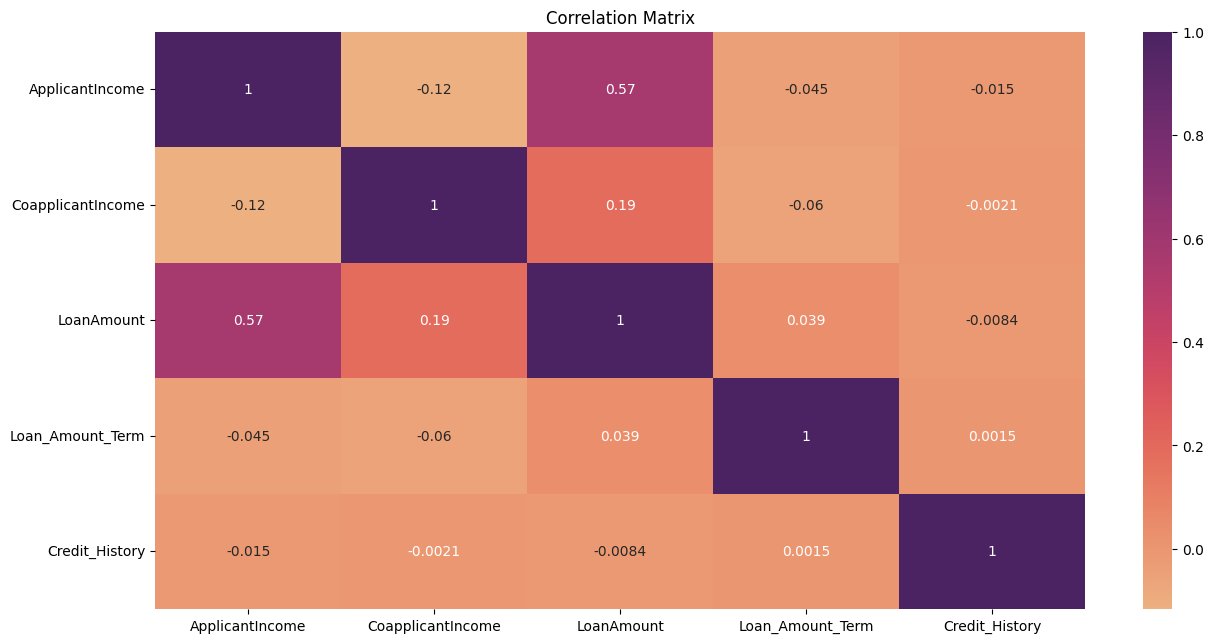

In [27]:
# Calculates the correlation coefficients between all pairs of numerical variables in the dataset
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(15, 7.5))
sns.heatmap(correlation_matrix, annot=True, cmap='flare') 
plt.title('Correlation Matrix')
plt.show()

There is positive correlation between **Loan Amount** and **Applicant Income**

## <font size="4" face="WildWest">3. Data Relationships Analysis</font>

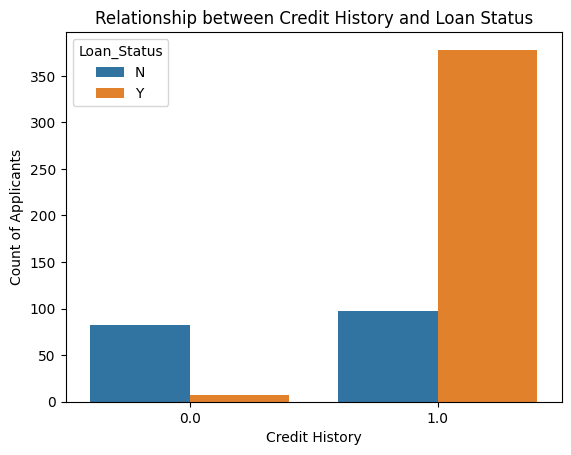

In [28]:
# Create the contingency table 
contingency_table = pd.crosstab(data['Credit_History'], data['Loan_Status'])


sns.countplot(x='Credit_History', hue='Loan_Status', data=data)

plt.xlabel('Credit History')
plt.ylabel('Count of Applicants')
plt.title('Relationship between Credit History and Loan Status')
plt.show()

Good credit history = Good chances of getting your loan approved

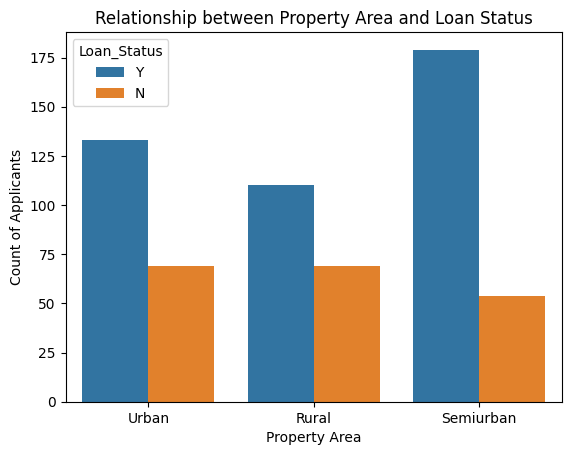

In [29]:
property_loan_table = pd.crosstab(data['Property_Area'], data['Loan_Status'])
sns.countplot(x='Property_Area', hue='Loan_Status', data=data)
plt.xlabel('Property Area')
plt.ylabel('Count of Applicants')
plt.title('Relationship between Property Area and Loan Status')
plt.show()

semiurban tops in case of loan area

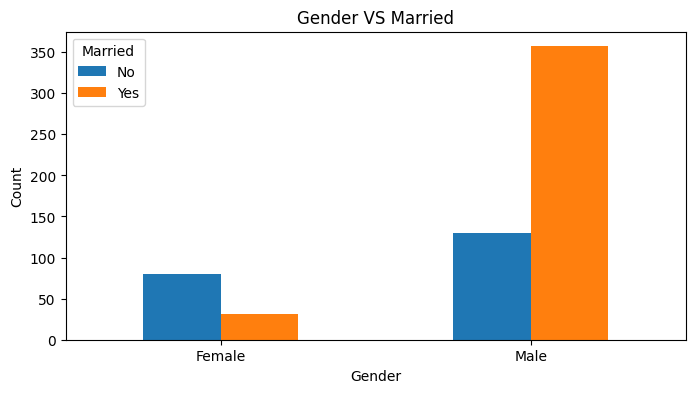

In [30]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(data.Gender, data.Married, dropna=True).plot(kind="bar", figsize=(8, 4))
plt.title('Gender VS Married')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

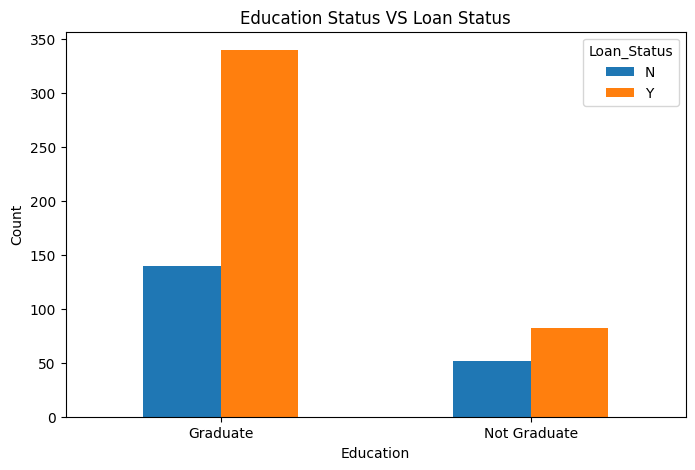

In [31]:
# Create a cross-tabulation of 'Gender' and 'Loan Status' variables
pd.crosstab(data.Education, data.Loan_Status).plot(kind="bar", figsize=(8, 5))
plt.title('Education Status VS Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Graduate applicant have more chances of paying loan back.

Data cleaning
- Remove Unneeded Features
- Handling Missing Values
- Encoding Categorical Variables
- Handling Outliers
- Handling Duplicates


Dropping the loan_id as it does not make any sense here. axis 0 means row while 1 means column
- inplace = True (changes are reflected in the original DataFrame) , inplace = False (default) means leaving the original DataFrame unchanged.

In [32]:
# Dropping Loan_ID column
data.drop(['Loan_ID'], axis = 1 , inplace = True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
None


In [33]:
# Check for missing values
null_counts = data.isnull().sum()
print(null_counts)

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


<font size="4" face="WildWest">There are two types of data:</font>
- Numerical Data
- Categorical Data

In [34]:
#Mode Imputatoin 
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0])


# Fill the missing values for categorical data.
data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])
#data = data.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'])

In [35]:
# Check for missing values after handling
null_counts = data.isnull().sum()
print(null_counts)

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


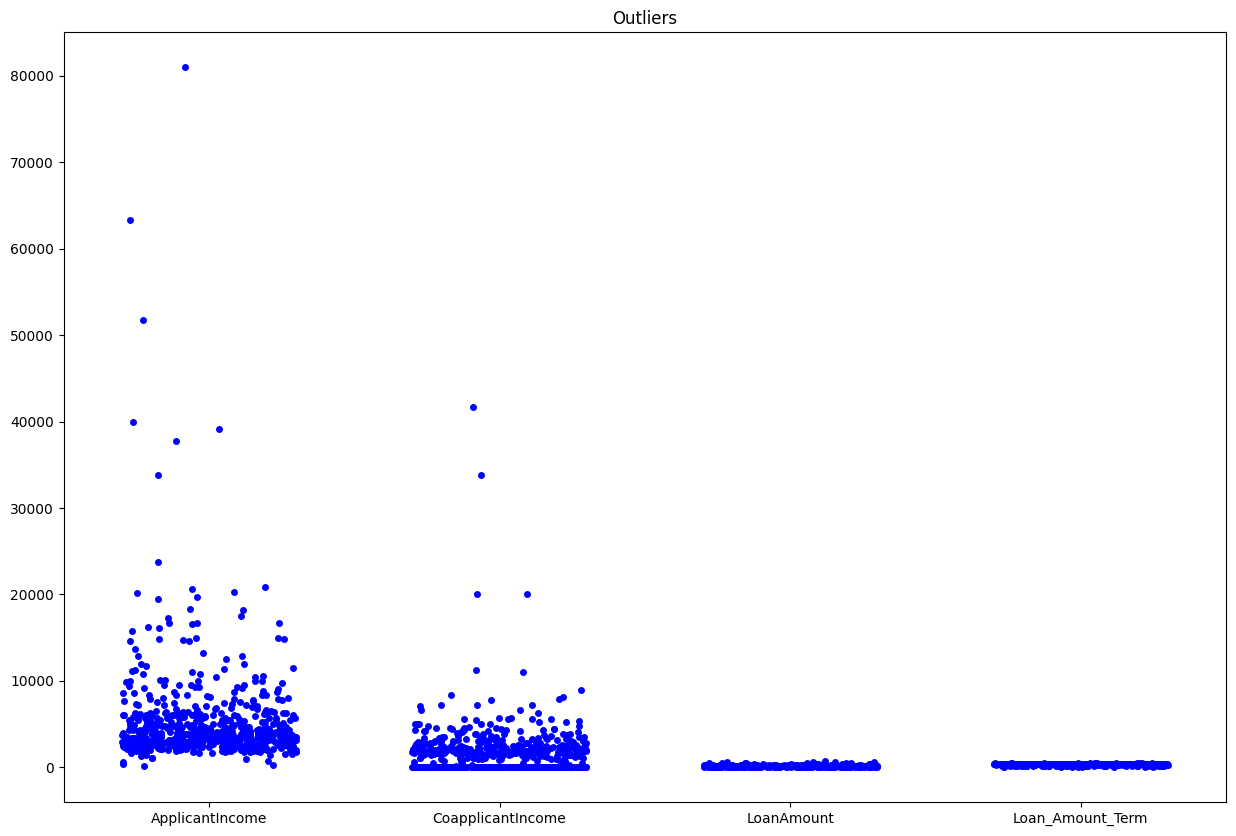

In [38]:
# Set the figure size
plt.figure(figsize=(15, 10))

outliersColumns = data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]) # variables that have outliers
sns.stripplot(data=outliersColumns, color="blue", jitter=0.3, size=5)
plt.title("Outliers")
plt.show()

**The Process**

In [41]:
# Reassign new values to them
Q1 = data.astype(np.float32).quantile(0.25)
Q3 = data.astype(np.float32).quantile(0.75)

IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

ValueError: could not convert string to float: 'Graduate'

In [ ]:
# Square Root Transformation - to normalized the distribution.
data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

print(data.shape)

Visualize data distribution after handling outliers

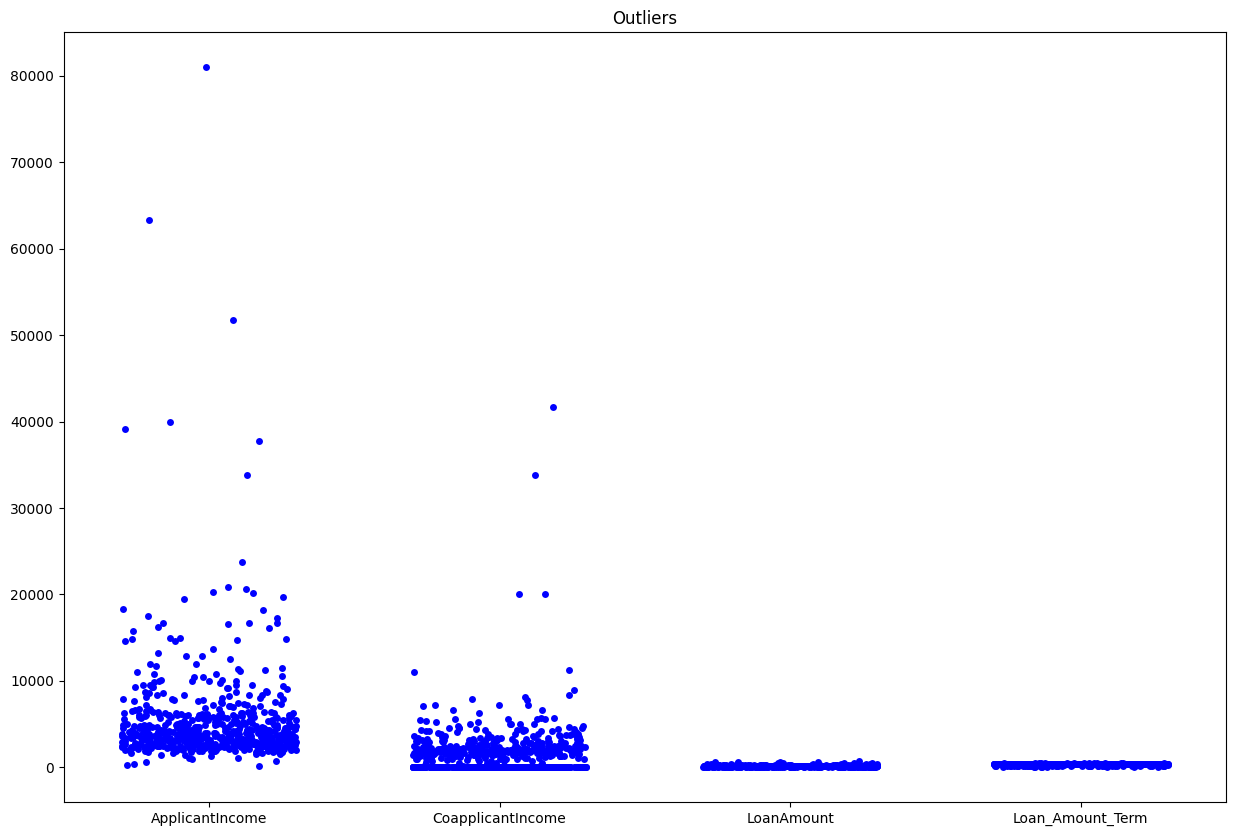

In [40]:
# Set the figure size
plt.figure(figsize=(15, 10))
outliersColumns = data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])
sns.stripplot(data=outliersColumns, color="blue", jitter=0.3, size=5)
plt.title("Outliers")
plt.show()

## <font size="4" face="WildWest">5. Handling Duplicates</font>

In [42]:
# List of column names to check for duplicates (Numerical values)
columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for column_name in columns_to_check:
    duplicate_count = data[column_name].duplicated().sum()
    if duplicate_count == 0:
        print(f"No duplicate entries found in the {column_name} column.", "green")
    else:
        print(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan")

Number of duplicate entries found in the ApplicantIncome column: 109 cyan
Number of duplicate entries found in the CoapplicantIncome column: 327 cyan
Number of duplicate entries found in the LoanAmount column: 410 cyan
Number of duplicate entries found in the Loan_Amount_Term column: 604 cyan
Number of duplicate entries found in the Credit_History column: 611 cyan


We don't need to handle duplicate values because it isn't affecting the accuracy or integrity of the analysis or model being performed.

Data Processing
 the machine learning algorithms can extract meaningful patterns and make accurate predictions, includes:
- Splitting data into "Features" - "Target"
- SMOTE Technique
- Data Re-scaling and Normalizing the features
- Splitting data into "Training" - "Testing" Data

## <font size="4" face="WildWest">1. Splitting data into "Features" - "Target"</font>

In [43]:
# Features "Inputs" (X)
X = data.drop(columns=['Loan_Status'])
Y = data['Loan_Status'] # Target variable
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (614, 11)
Shape of Y: (614,)



Min-Max Scaling: transforms the features so that they fall within a specified range, typically between 0 and 1.

Standardization: the features so that they have a mean of 0 , typically between -1 and 1.

In [44]:
# Rescale and normalize the features
'''
# Standardization (Normalization)
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
'''

# Min-Max Scaling (Rescaling)
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

#I will choose one of them in the future part "model selection" based on the highest accuracy

ValueError: could not convert string to float: 'Male'

## <font size="4" face="WildWest">4. Splitting data into "Training" - "Testing" Data</font>

In [45]:
# Split the data into training and testing sets
# X: Features, Y: Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (491, 11)
Shape of X_test: (123, 11)
Shape of Y_train: (491,)
Shape of Y_test: (123,)


## <font size="4" face="WildWest">1. Importing models for selection process</font>

In [46]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,BernoulliNB 
from sklearn.linear_model import RidgeClassifierCV, LogisticRegression
from sklearn.svm import SVC  
from sklearn.ensemble import GradientBoostingClassifier

## <font size="4" face="WildWest">2. Training the Machine Learning Algorithms</font>

- Decision Tree Classifier

In [43]:
# Decision Tree Classifier Parameters
'''
sklearn.tree.DecisionTreeClassifier(*, criterion='gini', 
                                    splitter='best', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features=None, 
                                    random_state=None, max_leaf_nodes=None, 
                                    min_impurity_decrease=0.0, class_weight=None, 
                                    ccp_alpha=0.0, monotonic_cst=None)
'''

scoreListDT_Train = []
scoreListDT_Test = []

for i in range(1, 20):
    for j in range(1, 5):
        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)
        Model1.fit(X_train, Y_train)
        scoreListDT_Train.append(Model1.score(X_train, Y_train))
        scoreListDT_Test.append(Model1.score(X_test, Y_test))

# Find the maximum accuracy for both training and testing
DT_Accuracy_Train = max(scoreListDT_Train) 
DT_Accuracy_Test = max(scoreListDT_Test)

print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 85.71%


- Random Forest Classifier

In [45]:
# Random Forest Classifier Parameters
'''
sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
                                        max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                        min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
                                        min_impurity_decrease=0.0, bootstrap=True, oob_score=False, 
                                        n_jobs=None, random_state=None, verbose=0, 
                                        warm_start=False, class_weight=None, ccp_alpha=0.0, 
                                        max_samples=None, monotonic_cst=None)
'''
scoreListRF_Train = []
scoreListRF_Test = []

'''
max_dep      ----------> (1, 5),(1, 10) 
rand_state   ----------> (1, 35),(1, 50)
n_est        ----------> (1, 30),(1, 30)
'''

for max_dep in range(1, 10):
    for rand_state in range(1, 50):
        for n_est in range(1, 30):
            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            Model2.fit(X_train, Y_train)
            scoreListRF_Train.append(Model2.score(X_train, Y_train))
            scoreListRF_Test.append(Model2.score(X_test, Y_test))
            
RF_Accuracy_Train = max(scoreListRF_Train) 
RF_Accuracy_Test = max(scoreListRF_Test)

print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

Random Forest best accuracy (Training): 100.00%
Random Forest best accuracy (Testing): 89.29%


Model Evaluation
- Training Score
- Testing Score.
- Choosing the better Model.

## <font size="4" face="WildWest">1. Training Score</font>

In [55]:
# Dictionary to store model names and their respective training scores (key:value)
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
}

for model_name, accuracy in model_train_scores.items():
    print(f"{model_name:<50} Training Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Training Score: 100.0
Model 2-Random Forest Classifier                   Training Score: 100.0


## <font size="4" face="WildWest">2. Testing Score</font>

In [56]:
# Dictionary to store model names and their respective testing scores
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
}

for model_name, accuracy in model_test_scores.items():
    print(f"{model_name:<50} Testing Score: {accuracy*100}")

Model 1-Decision Tree Classifier                   Testing Score: 85.71428571428571
Model 2-Random Forest Classifier                   Testing Score: 89.28571428571429


## <font size="4" face="WildWest">3. Choosing the better Model.</font>

May the best Model win, here comes the Random Forest classifier

# <font color="#4863A0"> Model Deployment 🛠️</font>

In [57]:
import pickle
filename = 'credit_decisioning.pkl'
pickle.dump("Model 1", open(filename, 'wb'))